In [47]:
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [48]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory("/Users/ramnaresh/Documents/CSESem5/DL/Convolutional Neural Networks/Python/dataset/training_set",
                                                 target_size=(64, 64),
                                                 batch_size=64,
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


In [49]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

testing_set = test_datagen.flow_from_directory("/Users/ramnaresh/Documents/CSESem5/DL/Convolutional Neural Networks/Python/dataset/test_set",
                                               target_size=(64,64),
                                               batch_size=64,
                                               class_mode='binary')

Found 1999 images belonging to 2 classes.


In [33]:
training_set[0][0]

array([[[[0.5882353 , 0.5137255 , 0.49803925],
         [0.5882353 , 0.5137255 , 0.49803925],
         [0.5656842 , 0.47596556, 0.4434971 ],
         ...,
         [0.5442956 , 0.4736468 , 0.41297603],
         [0.5176471 , 0.46274513, 0.41176474],
         [0.5176471 , 0.46274513, 0.41176474]],

        [[0.5882353 , 0.5137255 , 0.49803925],
         [0.5882353 , 0.5137255 , 0.49803925],
         [0.56521547, 0.4751806 , 0.4423632 ],
         ...,
         [0.54405576, 0.47354868, 0.41296512],
         [0.5176471 , 0.46274513, 0.41176474],
         [0.5176471 , 0.46274513, 0.41176474]],

        [[0.5882353 , 0.5137255 , 0.49803925],
         [0.5882353 , 0.5137255 , 0.49803925],
         [0.5647466 , 0.4743956 , 0.44122937],
         ...,
         [0.5438159 , 0.47345054, 0.41295424],
         [0.5176471 , 0.46274513, 0.41176474],
         [0.5176471 , 0.46274513, 0.41176474]],

        ...,

        [[0.27450982, 0.1254902 , 0.08235294],
         [0.27450982, 0.1254902 , 0.08235294]

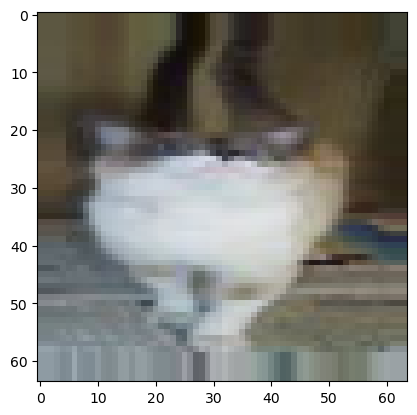

In [34]:
from matplotlib import pyplot as plt
plt.imshow(training_set[0][0][1])
plt.show()

In [35]:
training_set[0][1][1]

0.0

# Model

In [42]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(64, 64, 3)))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(rate=0.2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(rate=0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

2023-11-27 11:19:38.295045: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-11-27 11:19:38.295105: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-27 11:19:38.295168: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-27 11:19:38.295470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-27 11:19:38.295864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [43]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [51]:
history = model.fit(
    x=training_set, validation_data=testing_set,
    epochs=15
)

Epoch 1/15
125/125 [==============================] - 15s 121ms/step - loss: 0.6052 - accuracy: 0.7120 - val_loss: 0.5144 - val_accuracy: 0.7643
Epoch 2/15
125/125 [==============================] - 15s 119ms/step - loss: 0.6128 - accuracy: 0.7156 - val_loss: 0.5285 - val_accuracy: 0.7489
Epoch 3/15
125/125 [==============================] - 15s 120ms/step - loss: 0.6158 - accuracy: 0.7215 - val_loss: 0.9410 - val_accuracy: 0.6424
Epoch 4/15
125/125 [==============================] - 15s 120ms/step - loss: 0.6622 - accuracy: 0.6975 - val_loss: 0.5379 - val_accuracy: 0.7551
Epoch 5/15
125/125 [==============================] - 15s 121ms/step - loss: 0.6947 - accuracy: 0.6996 - val_loss: 0.5504 - val_accuracy: 0.7395
Epoch 6/15
125/125 [==============================] - 16s 125ms/step - loss: 0.7865 - accuracy: 0.6860 - val_loss: 0.5398 - val_accuracy: 0.7537
Epoch 7/15
125/125 [==============================] - 15s 123ms/step - loss: 0.8499 - accuracy: 0.6666 - val_loss: 0.6555 - val_ac

In [50]:
model.evaluate(x=testing_set)

32/32 [==============================] - 5s 102ms/step - loss: 0.5058 - accuracy: 0.7624


[0.5057591795921326, 0.7624348998069763]